# Exact solution used in MES runs


We would like to MES the operation

$$
\frac{1}{J}\partial_\rho (f)
$$

Using cylindrical geometry.

In [1]:
%matplotlib notebook

from sympy import init_printing
from sympy import S
from sympy import sin, cos, tanh, exp, pi, sqrt

from boutdata.mms import x, y, z, t
from boutdata.mms import DDX

import os, sys
# If we add to sys.path, then it must be an absolute path
common_dir = os.path.abspath('./../../../../common')
# Sys path is a list of system paths
sys.path.append(common_dir)
from CELMAPy.MES import get_metric, make_plot, BOUT_print

init_printing()

## Initialize

In [2]:
folder = '../properZ/'
metric = get_metric()

## Define the variables

In [3]:
# Initialization
the_vars = {}

**NOTE**:

1. z must be periodic
2. The field $f(\rho, \theta)$ must be of class infinity in $z=0$ and $z=2\pi$
3. The field $f(\rho, \theta)$ must be single valued when $\rho\to0$
4. The field $f(\rho, \theta)$ must be continuous in the $\rho$ direction with $f(\rho, \theta + \pi)$
5. Eventual BC in $\rho$ must be satisfied

In [4]:
# We need Lx
from boututils.options import BOUTOptions
myOpts = BOUTOptions(folder)
Lx = eval(myOpts.geom['Lx'])

In [5]:
# We make f a tanh function
# NOTE: We get a blow up in S here

# We multiply with cos(6*pi*x/(2*Lx)) in order to give it a modulation, and to get a non-zero value at the boundary
# We multiply with (x/Lx) in order for S not to blow up at rho=0
s = 0.15
c = 50
w = 30
the_vars['f'] = ((1/2) - (1/2)*(tanh(s*(x-(c - (w/2))))))*cos(6*pi*x/(2*Lx))*sin(2*z)

Calculating the solution

In [6]:
the_vars['S'] = (1/metric.J)*DDX(the_vars['f'], metric=metric)

## Plot

<IPython.core.display.Javascript object>


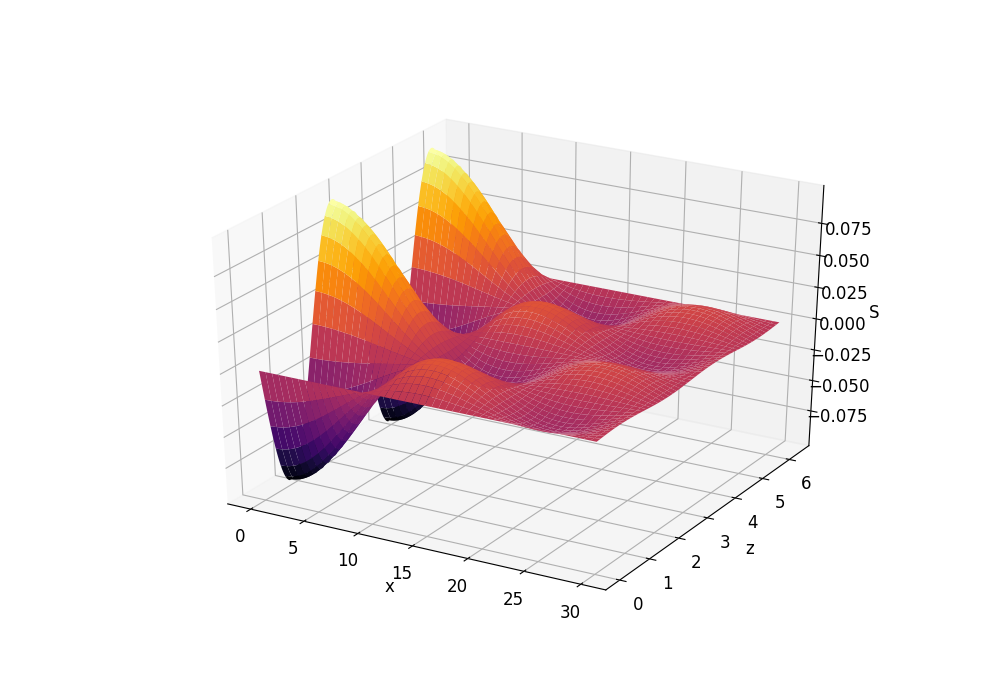

<IPython.core.display.Javascript object>


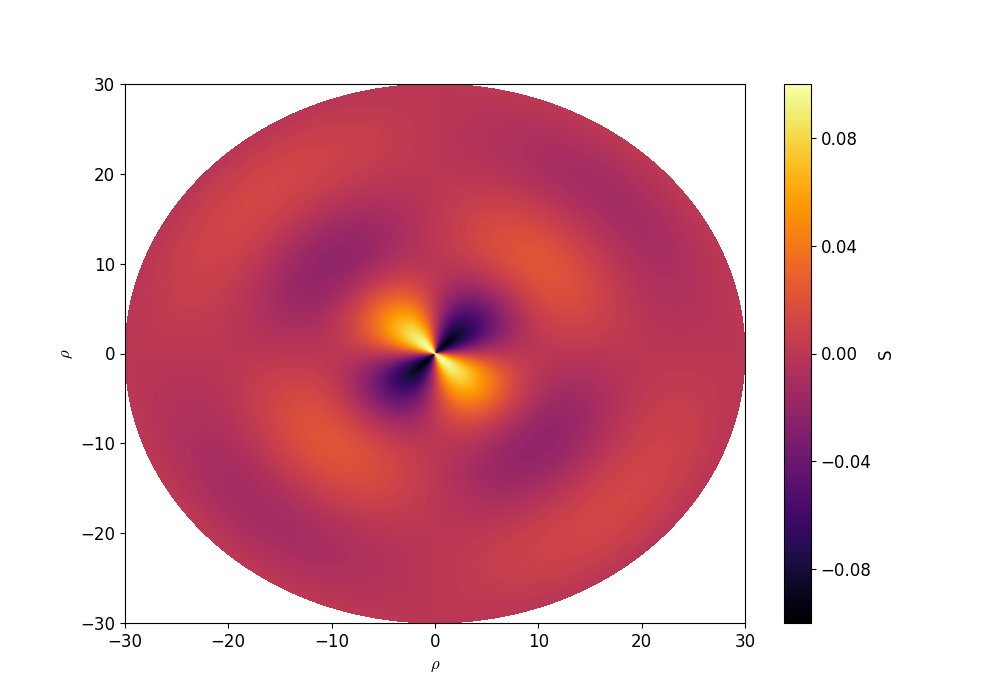

<IPython.core.display.Javascript object>


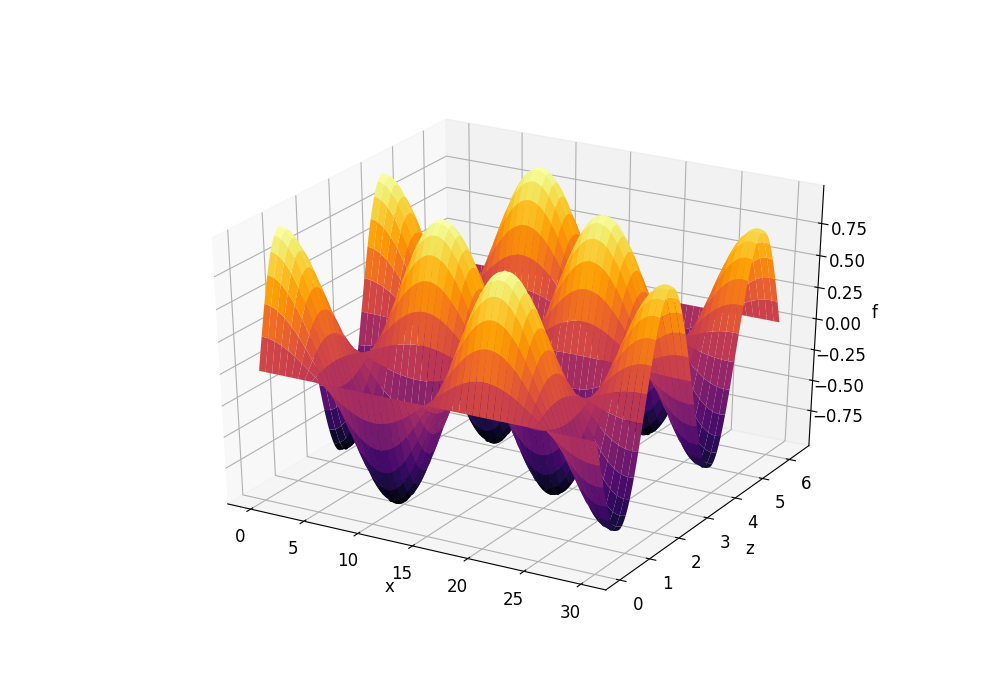

<IPython.core.display.Javascript object>


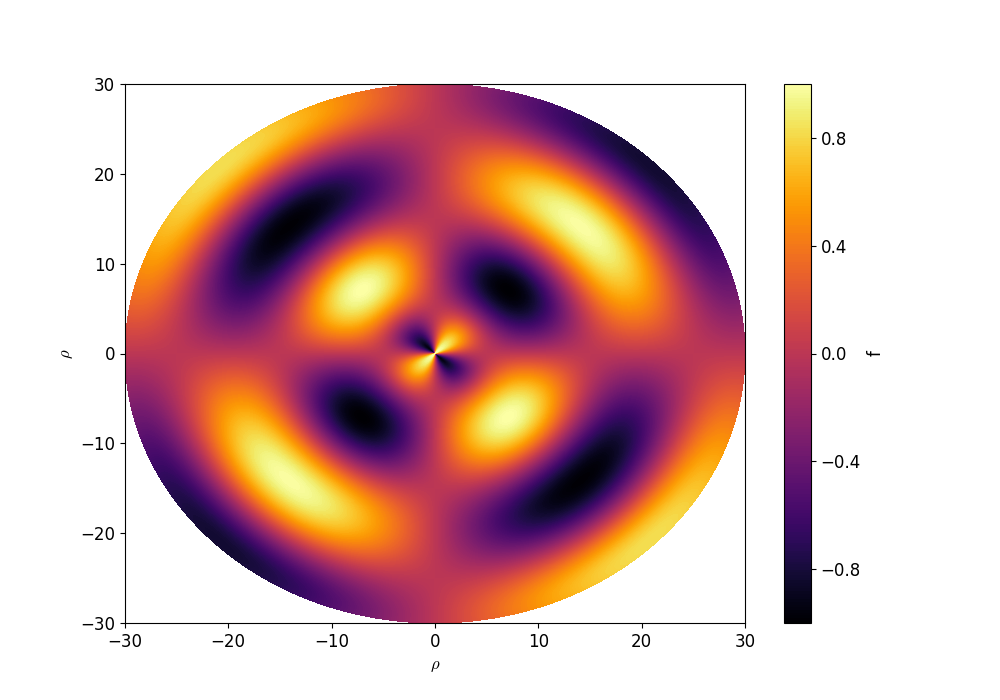

In [7]:
make_plot(folder=folder, the_vars=the_vars, plot2d=True, include_aux=False)

## Print the variables in BOUT++ format

In [8]:
BOUT_print(the_vars, rational=False)


[S]
(-pi*(-0.5*tanh(0.15*geom:xl - 5.25) + 0.5)*sin(2*z)*sin(pi*geom:xl/10)/10 + (0.075*tanh(0.15*geom:xl - 5.25)^2 - 0.075)*sin(2*z)*cos(pi*geom:xl/10))/geom:xl

[f]
(-0.5*tanh(0.15*geom:xl - 5.25) + 0.5)*sin(2*z)*cos(pi*geom:xl/10)
